In [1]:
from utils.binaries import *
from utils.plotting import *

07:52:11 [INFO] utils          -- (<99999ms) -- import logging
07:52:11 [INFO] utils.binaries -- (   +94ms) -- import numpy as np
07:52:11 [INFO] utils.binaries -- (    +9ms) -- import uncertainties
07:52:11 [INFO] utils.binaries -- (  +166ms) -- import pandas as pd
07:52:11 [INFO] utils.binaries -- (    +1ms) -- import binaries.tools as tools
07:52:11 [INFO] utils.plotting -- (  +279ms) -- import matplotlib.pyplot as plt
07:52:12 [INFO] utils.plotting -- (  +324ms) -- import seaborn as so
07:52:12 [DBUG] utils.plotting -- (    +7ms) -- font size set to 9.5
07:52:12 [DBUG] utils.plotting -- (    +1ms) -- label size set to 13.0
07:52:12 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [6.6, 3.3]
07:52:12 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
07:52:12 [DBUG] utils.plotting -- (    +0ms) -- usetex set to False
07:52:12 [INFO] utils.plotting -- (    +3ms) -- import plotting.tools as plot


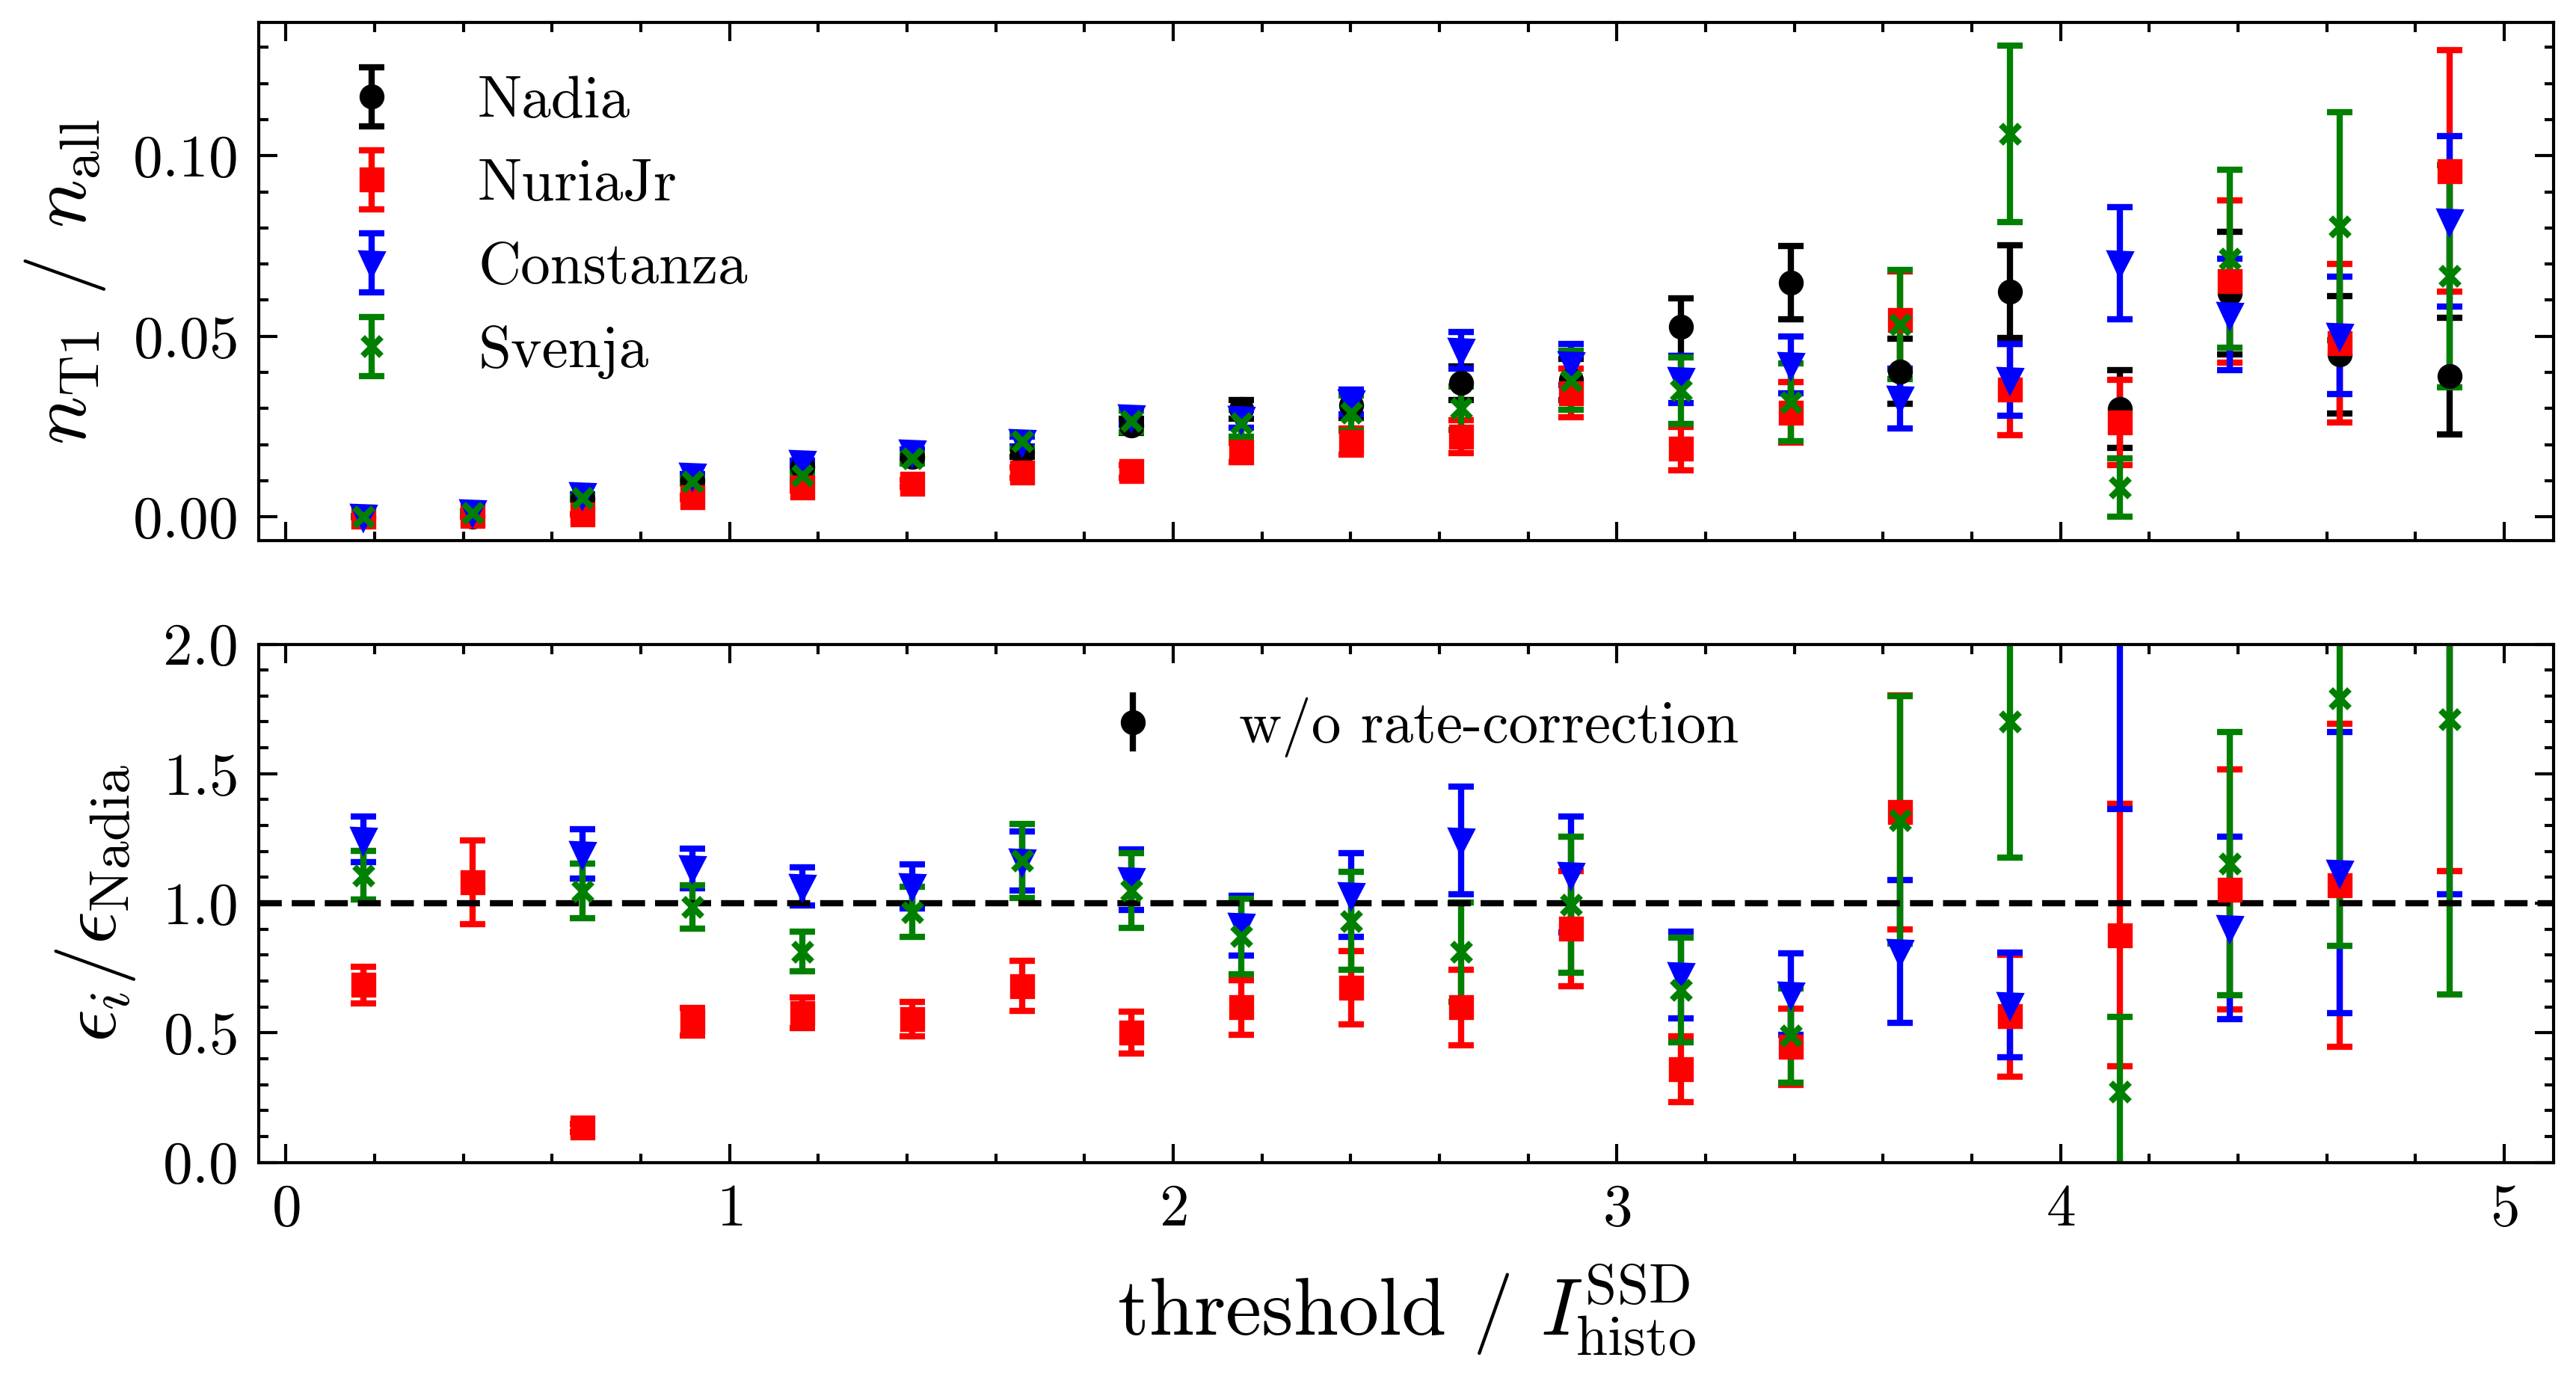

In [2]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from uncertainties import unumpy

MIP = {'Nadia':             44.8,
       'NuriaJr':           44.3,
       'Constanza' :        44.6,
       'Svenja' :           48.9}

# ratios = []
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

global_bins = np.geomspace(5e-2, 5, 20)

Nadia_all = np.loadtxt(f'/cr/users/filip/Data/StationEfficiencies/Nadia_all.gz') / MIP['Nadia']
Nadia_t1s = np.loadtxt(f'/cr/users/filip/Data/StationEfficiencies/Nadia_t1s.gz') / MIP['Nadia']

n_all, _ = np.histogram(Nadia_all, bins=20, range=(0.05, 5))
n_t1s, _ = np.histogram(Nadia_t1s, bins=20, range=(0.05, 5))
_all = unumpy.uarray(n_all, np.sqrt(n_all))
_t1s = unumpy.uarray(n_t1s, np.sqrt(n_t1s))
compare_ratio = _t1s / _all
y, y_err = [x.n for x in compare_ratio], [x.std_dev for x in compare_ratio]
ax1.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, label='Nadia', fmt='o', capsize=2, markersize=3)

fmts = ['s', 'v', 'x']
for station, fmt in zip(["NuriaJr", "Constanza", 'Svenja'], fmts):
       base = f'/cr/users/filip/Data/StationEfficiencies/{station}'

       n_all, _ = np.histogram(np.loadtxt(f'{base}_all.gz') / MIP[station], bins=20, range=(0.05, 5))
       n_t1s, _ = np.histogram(np.loadtxt(f'{base}_t1s.gz') / MIP[station], bins=20, range=(0.05, 5))

       _all = unumpy.uarray(n_all, np.sqrt(n_all))
       _t1s = unumpy.uarray(n_t1s, np.sqrt(n_t1s))
       ratio = _t1s / _all

       y, y_err = [x.n for x in ratio], [x.std_dev for x in ratio]
       points = ax1.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, label=station, fmt=fmt, capsize=2, markersize=3)

       double_ratio = ratio / compare_ratio
       y, y_err = [x.n for x in double_ratio], [x.std_dev for x in double_ratio]
       ax2.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, fmt=fmt, capsize=2, c=points[0].get_color(), markersize=3)

       # # rate correction
       # rates = np.loadtxt(f'/cr/data02/AugerPrime/UUB/UubRandoms/t1_rates/{station}.txt', usecols=[2])
       # correction_factor = np.mean(rates) / 100

       # double_ratio_rate_corrected = double_ratio / correction_factor
       # y, y_err = [x.n for x in double_ratio_rate_corrected], [x.std_dev for x in double_ratio_rate_corrected]
       # ax2.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, fmt=fmt, capsize=2, c=points[0].get_color(), markersize=3, markerfacecolor='w')

ax2.errorbar([], [], [], fmt='o', capsize=2, c='k', markersize=3, label='w/o rate-correction')
# ax2.errorbar([], [], [], fmt='o', capsize=2, c='k', markersize=3, markerfacecolor='w', label='w/ rate-correction')

ax2.set_ylim(0, 2)
ax2.axhline(1, ls='--', c='k')
ax1.legend()
ax2.legend()


ax1.set_ylabel(r"$n_\mathrm{T1}$ / $n_\mathrm{all}$")
ax1.set_ylabel(r"$n_\mathrm{T1}$ / $n_\mathrm{all}$")
ax2.set_xlabel("threshold / $I^\mathrm{SSD}_\mathrm{histo}$")
ax2.set_ylabel("$\epsilon_{i} / \epsilon_\mathrm{Nadia}$")
ax1.legend()

plt.savefig('/cr/users/filip/plots/UubRandoms/t1_efficiencies/no_correction.png')

10:03:18 [DBUG] utils.plotting -- (+90171ms) -- font size set to 9.5
10:03:18 [DBUG] utils.plotting -- (    +4ms) -- label size set to 13.0


10:03:18 [DBUG] utils.plotting -- (    +4ms) -- figure size set to [3.3, 2.5]
10:03:18 [DBUG] utils.plotting -- (    +2ms) -- markersize set to 2.0
10:03:18 [DBUG] utils.plotting -- (    +5ms) -- usetex set to True


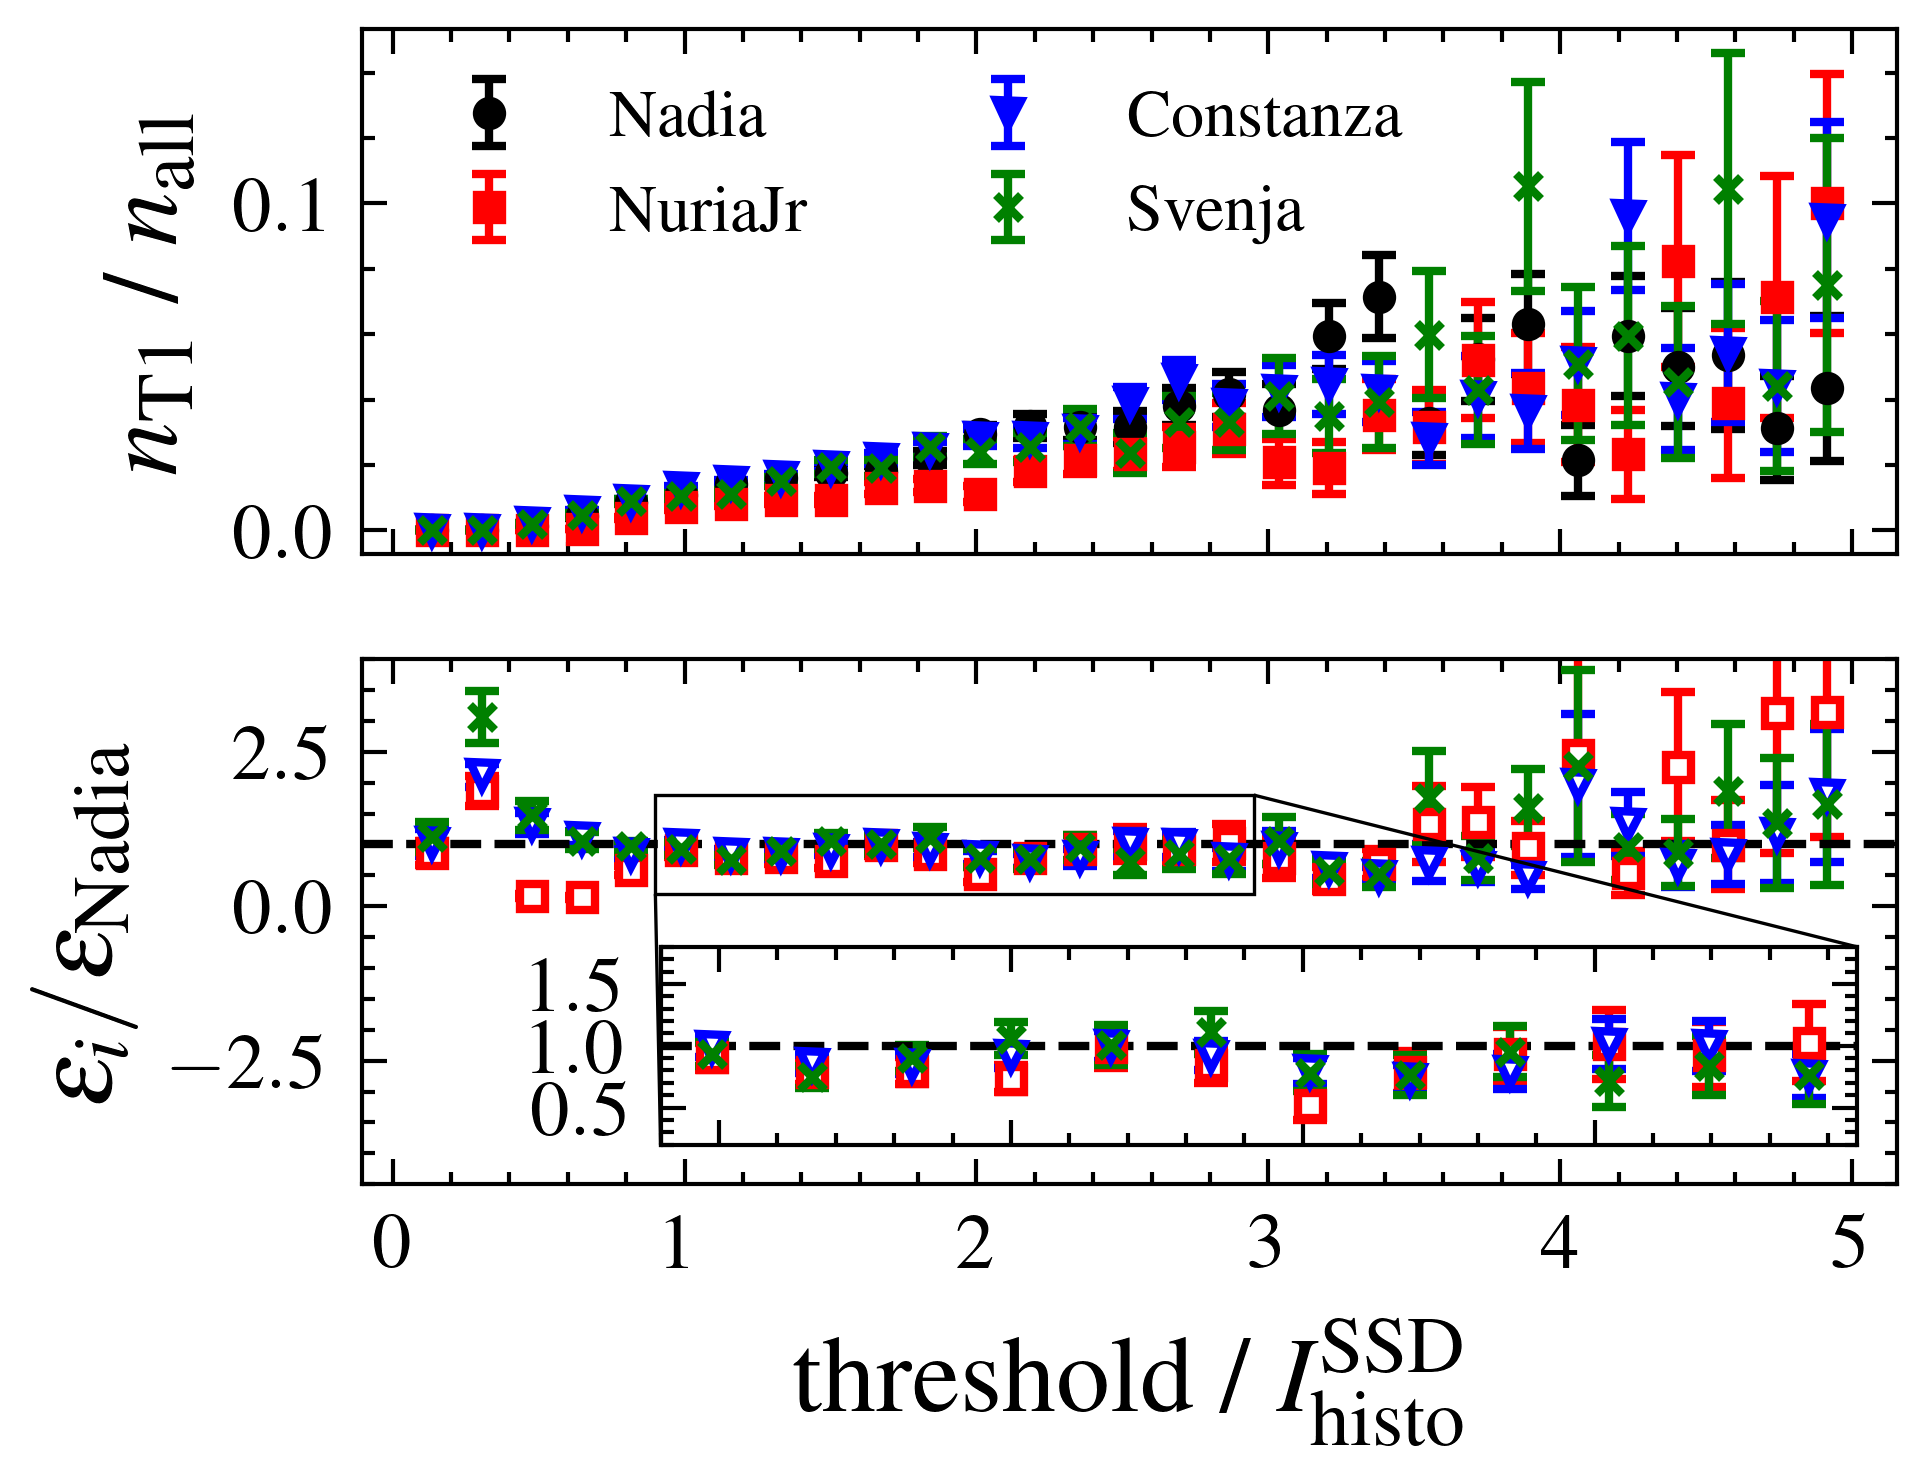

In [5]:
from utils.binaries import *
from utils.plotting import *
from uncertainties import unumpy
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

set_plt_style('double tex')

unan = uncertainties.ufloat(np.nan, np.nan)
MIP = {'Nadia':             44.8,
       'NuriaJr':           44.3,
       'Constanza' :        44.6,
       'Svenja' :           48.9}

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

global_bins = np.linspace(5e-2, 5, 30)

Nadia_all = np.loadtxt(f'/cr/users/filip/Data/StationEfficiencies/Nadia_all.gz') / MIP['Nadia']
Nadia_t1s = np.loadtxt(f'/cr/users/filip/Data/StationEfficiencies/Nadia_t1s.gz') / MIP['Nadia']

n_all, _ = np.histogram(Nadia_all, bins=global_bins)
n_t1s, _ = np.histogram(Nadia_t1s, bins=global_bins)
min_index = np.argmin(np.abs(1 - 0.5 * (_[1:] + _[:-1])))
max_index = np.argmin(np.abs(3 - 0.5 * (_[1:] + _[:-1])))
_all = unumpy.uarray(n_all, np.sqrt(n_all))
_t1s = unumpy.uarray(n_t1s, np.sqrt(n_t1s))
compare_ratio = np.array([x/y if y!=0 else unan for x, y in zip(_t1s, _all)])
y, y_err = [x.n for x in compare_ratio], [x.std_dev for x in compare_ratio]
ax1.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, label='Nadia', fmt='o', capsize=2, markersize=3)
ax2_zoomed = zoomed_inset_axes(ax2, 2, loc=4)
all_ratios = [compare_ratio[min_index:max_index]]

fmts = ['s', 'v', 'x']
for station, fmt in zip(["NuriaJr", "Constanza", 'Svenja'], fmts):
       base = f'/cr/users/filip/Data/StationEfficiencies/{station}'

       n_all, _ = np.histogram(np.loadtxt(f'{base}_all.gz') / MIP[station], bins=global_bins)
       n_t1s, _ = np.histogram(np.loadtxt(f'{base}_t1s.gz') / MIP[station], bins=global_bins)

       _all = unumpy.uarray(n_all, np.sqrt(n_all))
       _t1s = unumpy.uarray(n_t1s, np.sqrt(n_t1s))
       ratio = _t1s / _all

       y, y_err = [x.n for x in ratio], [x.std_dev for x in ratio]
       points = ax1.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, label=station, fmt=fmt, capsize=2, markersize=3)

       double_ratio = [x/y if y!=0 else unan for x, y in zip(ratio, compare_ratio)]
       double_ratio = np.array(double_ratio)
       
       # y, y_err = [x.n for x in double_ratio], [x.std_dev for x in double_ratio]
       # ax2.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, fmt=fmt, capsize=2, c=points[0].get_color(), markersize=3)
       # ax2_zoomed.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, fmt=fmt, capsize=2, c=points[0].get_color(), markersize=3)

       # rate correction
       rates = np.loadtxt(f'/cr/data02/AugerPrime/UUB/UubRandoms/t1_rates/{station}.txt', usecols=[2])
       correction_factor = np.mean(rates) / 100

       double_ratio_rate_corrected = double_ratio / correction_factor
       y, y_err = [x.n for x in double_ratio_rate_corrected], [x.std_dev for x in double_ratio_rate_corrected]
       ax2.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, fmt=fmt, capsize=2, c=points[0].get_color(), markersize=3, markerfacecolor='w')
       ax2_zoomed.errorbar(0.5 * (_[1:] + _[:-1]), y, y_err, fmt=fmt, capsize=2, c=points[0].get_color(), markersize=3, markerfacecolor='w')
       
       # if station == 'NuriaJr': continue
       all_ratios.append(ratio[min_index:max_index])
# ax2.errorbar([], [], [], fmt='o', capsize=2, c='k', markersize=3, label='w/o rate-correction')
# ax2.errorbar([], [], [], fmt='o', capsize=2, c='k', markersize=3, markerfacecolor='w', label='w/ rate-correction')

ax2.set_ylim(-4.5, 4)
ax2.axhline(1, ls='--', c='k')
ax1.legend()
# ax2.legend()

# # zoomed plot
mark_inset(ax2, ax2_zoomed, loc1=3, loc2=1, lw=0.4, ec='k')
# ax2_zoomed.errorbar(x[1:], [y.n for y in ratios], [y.std_dev for y in ratios], fmt='o', capsize=2)
ax2_zoomed.axhline(1, ls='--')
ax2_zoomed.set_xlim(0.9, 2.95)
ax2_zoomed.set_ylim(0.2, 1.8)
plt.setp(ax2_zoomed.get_xticklabels(), visible=False)
# plt.setp(ax2_zoomed.get_yticklabels(), visible=False)

ax1.set_ylabel(r"$n_\mathrm{T1}$ / $n_\mathrm{all}$")
ax1.set_ylabel(r"$n_\mathrm{T1}$ / $n_\mathrm{all}$")
ax2.set_xlabel("threshold / $I^\mathrm{SSD}_\mathrm{histo}$")
ax2.set_ylabel("$\epsilon_{i} / \epsilon_\mathrm{Nadia}$")
ax1.legend(ncol=2, fontsize=8)

plt.savefig('/cr/users/filip/plots/UubRandoms/t1_efficiencies/rate_correction.png', bbox_inches='tight')

In [42]:
from itertools import combinations

all_ratios = np.array(all_ratios)
fluctuations = []

for i, (this, that) in enumerate(combinations(all_ratios, 2)):
    fluct = np.std([f.n for f in (this / that)])
    fluctuations.append(fluct)

print(np.mean(fluctuations))

0.174177797822206


In [29]:
print(len(all_ratios[1]))

12


In [4]:
# for station in ["NuriaJr", "Constanza"]:

#     if station == 'Constanza': continue

#     ssd_only = np.loadtxt(f'/cr/users/filip/Data/StationEfficiencies/{station}_t1s.gz') / MIP[station]
#     ssd_and_t1 = np.loadtxt(f'/cr/users/filip/Data/StationEfficiencies/{station}_all.gz') / MIP[station]

#     print(len(ssd_only), len(ssd_and_t1))



#     x, y, y_errors = [], [], []
#     for loc, a, b in zip(0.5 * (log_bins[1:] + log_bins[:-1]) / MIP[station], n_ssd, n_wcd):
#         cov = np.array([[np.sqrt(a), 0], [0, b]])
#         (ssd, wcd) = uncertainties.correlated_values((a, b), cov)

#         try:
#             ratio = wcd / (wcd + ssd)
#         except ZeroDivisionError: continue

#         ratios.append(ratio)
#         y.append(ratio.n)
#         y_errors.append(ratio.std_dev)
#         x.append(loc)

#     ax1.errorbar(x, y, y_errors, label=station, fmt='o', capsize=2)


# ax1.axhline(0.5)
# station1, station2 = ratios[:len(ratios) // 2], ratios[len(ratios) // 2:]
# ratios = [s1 / s2 if not s2 == 0 else uncertainties.ufloat(np.nan, 1) for s1, s2 in zip(station1, station2)]
# ax2.errorbar(x, [y.n for y in ratios], [y.std_dev for y in ratios], fmt='o', capsize=2)
# ax2.axhline(1, ls='--')
# ax2.set_ylabel("$\epsilon_\mathrm{Nadia} / \epsilon_\mathrm{Nuria}$")

# ax1.set_ylabel(r"$n_\mathrm{T1}$ / $n_\mathrm{all}$")
# ax1.legend()
# ax2.set_xscale('log')
# ax2.set_xlabel("threshold / $I^\mathrm{SSD}_\mathrm{histo}$")

# # # zoomed plot
# ax2_zoomed = zoomed_inset_axes(ax2, 2, loc=1)
# ax2_zoomed.errorbar(x[1:], [y.n for y in ratios], [y.std_dev for y in ratios], fmt='o', capsize=2)
# ax2_zoomed.axhline(1, ls='--')
# ax2_zoomed.set_xlim(0.7, 2.4)
# ax2_zoomed.set_ylim(0.85, 2.1)

# plt.setp(ax2_zoomed.get_xticklabels(), visible=False)
# plt.setp(ax2_zoomed.get_yticklabels(), visible=False)
# mark_inset(ax2, ax2_zoomed, loc1=3, loc2=4, lw=0.4, ec='k')

# plt.savefig('t1_efficiencies.png')